In [0]:

#import tensorflow.contrib.eager as tfe
import tensorflow as tf
from keras.preprocessing import image
#import PIL
#from PIL import Image
from keras.models import Model
from keras.layers import Dense, Input, subtract, concatenate, Lambda, add, maximum
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop
from keras.models import load_model, model_from_json
import numpy as np

Using TensorFlow backend.


In [0]:

def triplet_loss(inputs, dist='euclidean', margin='maxplus'):
    anchor, positive, negative = inputs
    positive_distance = K.square(anchor - positive)
    negative_distance = K.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = K.sqrt(K.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = K.sqrt(K.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = K.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = K.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = K.maximum(0.0, 2 + loss)
    elif margin == 'softplus':
        loss = K.log(1 + K.exp(loss))
        
    returned_loss = K.mean(loss)
    return returned_loss
  
def identity_loss(y_true, y_pred):
    return K.mean(y_pred - 0 * y_true)  

In [0]:
!ls

drive  pic_a1.jpg  pic_a3.jpg  pic_a6.jpg  sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
zf=ZipFile('drive/My Drive/siamese_data/images.zip', 'r')
zf.extractall('/content/drive/My Drive/siamese_data/')
zf.close()

In [0]:
import cv2
import os
def get_len_folder(dir):
  c = 0
  for i in os.listdir(dir):
    c = c+1
  return c

In [0]:
import cv2
from os import listdir
from random import randrange

In [0]:

dir = "drive/My Drive/Dataset/siamese_data/new_dataset"
len_of_p = {}
dir_len = get_len_folder(dir)
for i in listdir(dir):
  len_of_p[i] = get_len_folder(dir +"/" + i)
  

train = []
progress=0
curr_person = -1
for p in listdir(dir):
  curr_person = curr_person+1
  p_path = dir + "/" + p
  curr_len = get_len_folder(p_path)
  for i in range(10):
    an = randrange(0, curr_len, 1)
    pos = -1
    while(pos==-1 or pos==an):
      pos = randrange(0, curr_len, 1)
    an_name = listdir(p_path)[an]
    pos_name = listdir(p_path)[pos]
    an_dir = p_path +"/" + an_name
    pos_dir = p_path + "/" + pos_name
    
    n_person = -1
    while(n_person == -1 or n_person == curr_person):
      n_person = randrange(0, dir_len, 1)
    n_per_dir = dir + "/" + listdir(dir)[n_person]
    n_len = len_of_p[ listdir(dir)[n_person] ]
    n_p_name = randrange(0, n_len, 1)
    neg_dir = n_per_dir + "/" + listdir(n_per_dir)[n_p_name]
    
    an_img=cv2.imread(an_dir)
    an_img=cv2.resize(an_img, (224,224))
    
    pos_img=cv2.resize(cv2.imread(pos_dir),(224,224))
    neg_img=cv2.resize(cv2.imread(neg_dir),(224,224))
     
    temp=[]
    temp.append(an_img)
    temp.append(pos_img)
    temp.append(neg_img)
    temp=np.array(temp, dtype="float32")
    train.append(temp)
    print(progress, )
    progress = progress+1

    
    
    
    
  
  
  
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [0]:

train=np.array(train, dtype="float32")

In [0]:
train.shape

(30, 3, 224, 224, 3)

In [0]:
train_label = np.zeros((30,512))

In [0]:
#np.save("drive/My Drive/siamese_data/traindata.npy",train)

In [0]:
train = np.ar

In [0]:
train.shape

(200, 3, 224, 224, 3)

In [0]:
import numpy as np
n=np.append(train[0]);
n=np.append(train[1]);
n=np.append(train[2]);

NameError: ignored

In [0]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Conv2D,BatchNormalization,Dense,Dropout,Flatten,MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.models import Model

base = ResNet50(weights='imagenet')
for layer in base.layers:
    layer.trainable = True

x=base.layers[-6].output
x=GlobalAveragePooling2D()(x)















102858752/102853048 [==============================] - 1s 0us/step


In [0]:
new_model = Model(inputs=base.input, outputs=x)

In [0]:
'''new_model = Model(inputs=base.input, outputs=x)

anchor_input = Input(shape=( 224, 224, 3), name='anchor_input')
pos_input = Input(shape=( 224, 224, 3), name='pos_input')
neg_input = Input(shape=( 224, 224, 3), name='neg_input')
encoding_anchor   = new_model(anchor_input)
encoding_pos      = new_model(pos_input)
encoding_neg      = new_model(neg_input)
loss = Lambda(triplet_loss2)([encoding_anchor, encoding_pos, encoding_neg])
siamese_network = Model(inputs  = [anchor_input, pos_input, neg_input],
                       outputs = loss) # Note that the output of the model is the
                                       # return value from the triplet_loss function above
siamese_network.compile(optimizer=Adam(lr=.00004, clipnorm=1.), loss=identity_loss)


In [0]:
'''def triplet_loss2(inputs, dist='euclidean', margin='maxplus'):
    anchor, positive, negative = inputs
    positive_distance = K.square(anchor - positive)
    negative_distance = K.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = K.sqrt(K.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = K.sqrt(K.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = K.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = K.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = K.maximum(0.0, 2 + loss)
    elif margin == 'softplus':
        loss = K.log(1 + K.exp(loss))
        
    returned_loss = K.mean(loss)
    return returned_loss
  
def identity_loss(y_true, y_pred):
    return K.mean(y_pred - 0 * y_true)  

In [0]:
new_model = Model(inputs=base.input, outputs=x)

anchor_input = Input(shape=(224, 224, 3), name='anchor_input')
pos_input = Input(shape=(224, 224, 3), name='pos_input')
neg_input = Input(shape=(224, 224, 3), name='neg_input')
encoding_anchor   = new_model(anchor_input)
encoding_pos      = new_model(pos_input)
encoding_neg      = new_model(neg_input)
loss = Lambda(triplet_loss)([encoding_anchor, encoding_pos, encoding_neg])
siamese_network = Model(inputs  = [anchor_input, pos_input, neg_input],
                       outputs = loss) # Note that the output of the model is the
                                       # return value from the triplet_loss function above
siamese_network.compile(optimizer=Adam(lr=.00004, clipnorm=1.), loss=identity_loss)


In [0]:
for i in range(3):
  for j in range(30):
    an_final = train[j][0]
    an_final=np.resize(an_final, (1,224, 224, 3))
    pos_final = train[j][1]
    pos_final=np.resize(pos_final, (1,224, 224, 3))
    neg_final = train[j][2]
    neg_final=np.resize(neg_final, (1,224, 224, 3))
    
    label_final =  train_label[0]
    label_final = np.resize(label_final, (1, 512))
    
    siamese_network.fit(x = [an_final,pos_final,neg_final ] ,y =label_final,epochs = 1)
  

Epoch 1/1
1/1 [==============================] - 0s 413ms/step - loss: 0.9825
Epoch 1/1
1/1 [==============================] - 0s 371ms/step - loss: 0.5591
Epoch 1/1
1/1 [==============================] - 0s 359ms/step - loss: 0.5450
Epoch 1/1
1/1 [==============================] - 0s 353ms/step - loss: 0.1423
Epoch 1/1
1/1 [==============================] - 0s 339ms/step - loss: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 333ms/step - loss: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 345ms/step - loss: 0.0735
Epoch 1/1
1/1 [==============================] - 0s 342ms/step - loss: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 338ms/step - loss: 0.0652
Epoch 1/1
1/1 [==============================] - 0s 337ms/step - loss: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 338ms/step - loss: 0.2940
Epoch 1/1
1/1 [==============================] - 0s 346ms/step - loss: 1.7704
Epoch 1/1
1/1 [==============================] -

In [0]:
`for j in range(140, 150):
    an_final = train[j][0]
    an_final=np.resize(an_final, (1,224, 224, 3))
    pos_final = train[j][1]                                 #no no
    pos_final=np.resize(pos_final, (1,224, 224, 3))
    neg_final = train[j][2]
    neg_final=np.resize(neg_final, (1,224, 224, 3))
    
    label_final =  train_label[0]
    label_final = np.resize(label_final, (1, 512))
    siamese_network.evaluate(x = [an_final,pos_final,neg_final ] ,y =label_final)

In [0]:
in1= cv2.imread('pic_a4.jpg')
in2=np.resize(in1, (1,224, 224, 3))
img1 = new_model.predict(in2)

In [0]:
in3= cv2.imread('pic_a3.jpg')
in4=np.resize(in3, (1,224, 224, 3))
img2 = new_model.predict(in4)

In [0]:
in5= cv2.imread('pic_a7.jpg')
in6=np.resize(in5, (1,224, 224, 3))
img3 = new_model.predict(in6)

In [0]:
err1 = np.sum(np.abs(img2-img1))
err2 = np.sum(np.abs(img3-img1))

In [0]:
err2

103.89491

In [0]:
from matplotlib import pyplot as plt


TypeError: ignored

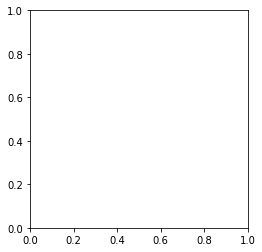

In [0]:
plt.imshow(in3)

In [0]:
new_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
siamese_network.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
pos_input (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
neg_input (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
model_9 (Model)                 (None, 2048)         23579520    anchor_input[0][0]               
                                                                 pos_input[0][0]           